In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stocks = ['CELH', 'CLX', 'EL', 'ELF', 'MMYT', 'ONON', 'SHAK', 'SOVO', 'STRT', 'WING']
start_date = '2022-12-30'
end_date = '2023-12-31'
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
daily_return = data.pct_change().loc['2023-01-01':'2023-12-31', :]
benchmark = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


In [28]:
daily_return

Ticker,CELH,CLX,EL,ELF,MMYT,ONON,SHAK,SOVO,STRT,WING
Date,,,,,,,,,,
2023-01-03,-0.034314,0.013753,0.023377,0.000723,-0.007254,-0.005245,0.003612,-0.043145,0.014599,-0.030373
2023-01-04,0.004379,0.010263,0.031507,0.011384,-0.014980,0.024019,0.076775,-0.021091,-0.010072,0.022932
2023-01-05,0.003171,-0.011411,-0.002825,-0.006432,0.017062,0.000000,0.013592,-0.003715,-0.003876,-0.030696
2023-01-06,-0.039218,0.016610,0.010108,0.043877,-0.008023,0.094394,0.020664,0.033557,0.010700,0.037110
2023-01-09,0.004216,-0.012323,-0.008264,-0.039449,-0.011397,-0.000523,0.035537,0.010101,0.102021,0.048316
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.004971,0.004959,-0.007081,-0.009366,0.022531,-0.037101,0.007323,-0.000453,0.115847,0.008280
2023-12-26,0.058153,0.000634,0.004016,-0.000695,0.015338,-0.001070,0.029079,0.001359,-0.010417,0.003099
2023-12-27,0.052314,-0.001832,0.004896,0.002157,-0.001277,-0.009643,-0.006541,0.000000,-0.087719,0.005483


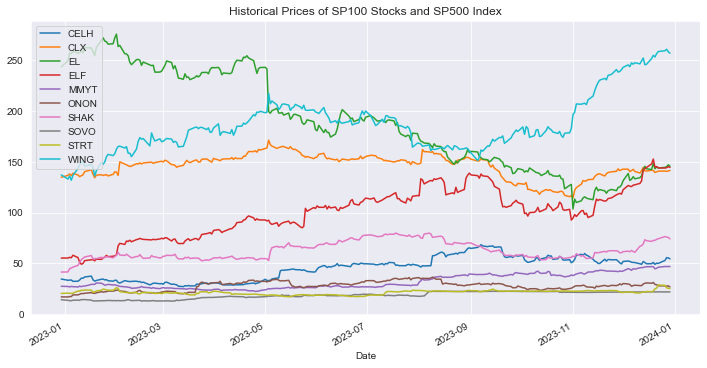

In [29]:
# Visualize the data
sns.set_style('darkgrid')
data.plot(figsize=(12, 6))
plt.title('Historical Prices of SP100 Stocks and SP500 Index')
plt.legend(loc='upper left')
plt.show()

In [30]:
data

Ticker,CELH,CLX,EL,ELF,MMYT,ONON,SHAK,SOVO,STRT,WING
Date,,,,,,,,,,
2022-12-30,34.680000,134.673233,243.201920,55.299999,27.570000,17.160000,41.529999,14.370000,20.549999,137.018539
2023-01-03,33.490002,136.525436,248.887192,55.340000,27.370001,17.070000,41.680000,13.750000,20.850000,132.856827
2023-01-04,33.636665,137.926575,256.728943,55.970001,26.959999,17.480000,44.880001,13.460000,20.639999,135.903442
2023-01-05,33.743332,136.352692,256.003571,55.610001,27.420000,17.480000,45.490002,13.410000,20.559999,131.731750
2023-01-06,32.419998,138.617569,258.591339,58.049999,27.200001,19.129999,46.430000,13.860000,20.780001,136.620316
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,50.040001,140.667404,143.788132,143.839996,46.290001,28.030001,74.279999,22.070000,28.799999,258.170013
2023-12-26,52.950001,140.756638,144.365555,143.740005,47.000000,28.000000,76.440002,22.100000,28.500000,258.970001
2023-12-27,55.720001,140.498825,145.072403,144.050003,46.939999,27.730000,75.940002,22.100000,26.000000,260.390015


In [31]:
import numpy as np

# Define the fitness function to maximize the Sharpe Ratio
def fitness_function(weights, data):
    data_returns = np.log(data) - np.log(data.shift(1))
    data_returns = data_returns.dropna()
    
    portfolio_returns = np.dot(data_returns, weights)
    portfolio_mean = np.mean(portfolio_returns)
    portfolio_std = np.std(portfolio_returns)
    sharpe_ratio = (portfolio_mean / portfolio_std) * np.sqrt(252)
    return sharpe_ratio

In [32]:
# Define the genetic algorithm
def genetic_algorithm(data, population_size=200, num_generations=50, mutation_rate=0.05, elitism=0.1):
    # Initialize the population
    population = np.random.rand(population_size, len(data.columns))
    population = population / np.sum(population, axis=1)[:, np.newaxis]

    # Calculate fitness of initial population
    fitness = np.array([fitness_function(individual, data) for individual in population])
    
    for generation in range(num_generations):
        # Sort the population by fitness
        sorted_idx = np.argsort(fitness)[::-1]
        population = population[sorted_idx]
        fitness = fitness[sorted_idx]
        
        # Determine number of individuals to carry over via elitism
        num_elites = int(elitism * population_size)
        
        # Create the next generation, starting with the elites
        offspring = population[:num_elites]
        
        # Select parents for reproduction using tournament selection
        parent1_idx = np.random.randint(num_elites, population_size, size=population_size-num_elites)
        parent2_idx = np.random.randint(num_elites, population_size, size=population_size-num_elites)
        parent1 = population[parent1_idx]
        parent2 = population[parent2_idx]

        # Perform crossover and mutation to create the next generation
        crossover_prob = np.random.rand(population_size-num_elites, len(data.columns))
        crossover_mask = crossover_prob <= 0.5
        offspring_crossover = np.where(crossover_mask, parent1, parent2)

        mutation_prob = np.random.rand(population_size-num_elites, len(data.columns))
        mutation_mask = mutation_prob <= mutation_rate
        mutation_values = np.random.rand(population_size-num_elites, len(data.columns))
        mutation_direction = np.random.choice([-1, 1], size=(population_size-num_elites, len(data.columns)))
        offspring_mutation = np.where(mutation_mask, offspring_crossover + mutation_direction * mutation_values, offspring_crossover)

        # Ensure the offspring population has valid weights
        offspring_mutation = offspring_mutation / np.sum(offspring_mutation, axis=1)[:, np.newaxis]

        # Combine elites and offspring to create the next generation
        population = np.vstack((population[:num_elites], offspring_mutation))
        
        # Calculate fitness of new population
        fitness = np.array([fitness_function(individual, data) for individual in population])
        
    # Return the best individual from the final population
    best_idx = np.argmax(fitness)
    best_individual = population[best_idx]
    print('Best Sharpe Ratio: ', np.max(fitness)) 

    return best_individual

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Best Sharpe Ratio:  nan


C:\Users\DELL\AppData\Local\Temp/ipykernel_23408/2332195020.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  benchmark_value = initial_capital * benchmark_cum_returns[-1]


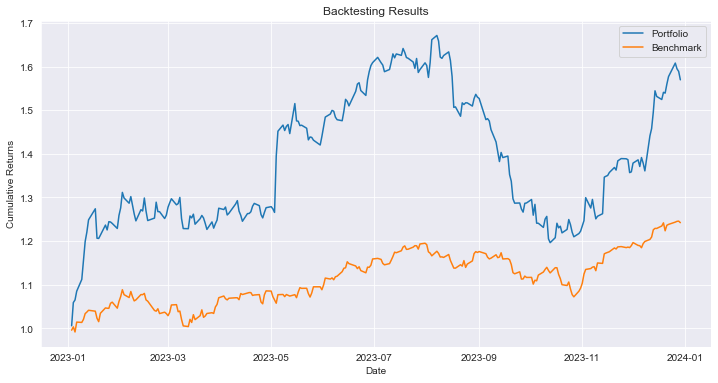

Portfolio Statistics:
---------------------
Mean Daily Return: 0.0020
Standard Deviation: 0.0175
Sharpe Ratio: 1.7788
Final Value: 1569.65

Benchmark Statistics:
---------------------
Mean Daily Return: 0.0009
Standard Deviation: 0.0082
Sharpe Ratio: 1.7398
Final Value: 1242.31


In [33]:
# Implement the genetic algorithm in backtesting
from datetime import datetime, timedelta

# Seed for reproducibility
np.random.seed(42)

def backtest(genetic_algorithm, data, benchmark, initial_capital):
    # Split the data into training and testing sets
    train_data = data.iloc[:-252]
    test_data = data.iloc[-252:]

    # Run the genetic algorithm on the training set to find the optimal portfolio weights
    weights = genetic_algorithm(data=train_data, population_size=100, num_generations=50, mutation_rate=0.01, elitism=0.01)
    # print(weights)

    # Set any negative weights to 0
    weights[weights < 0] = 0

    # Normalize remaining positive weights to sum to 1
    weights /= weights.sum()

    # Calculate the returns of the portfolio and the benchmark on the test set
    portfolio_returns = np.dot(test_data.pct_change().dropna(), weights)
    portfolio_cum_returns = np.cumprod(1 + portfolio_returns)
    portfolio_value = initial_capital * portfolio_cum_returns[-1]
    benchmark_returns = benchmark.iloc[-252:].pct_change().dropna()
    benchmark_cum_returns = np.cumprod(1 + benchmark_returns)
    benchmark_value = initial_capital * benchmark_cum_returns[-1]

    # Calculate performance metrics
    portfolio_mean_return = np.mean(portfolio_returns)
    portfolio_std = np.std(portfolio_returns)
    portfolio_sharpe_ratio = (portfolio_mean_return / portfolio_std) * np.sqrt(252)
    benchmark_mean_return = np.mean(benchmark_returns)
    benchmark_std = np.std(benchmark_returns)
    benchmark_sharpe_ratio = (benchmark_mean_return / benchmark_std) * np.sqrt(252)

    # print(portfolio_cum_returns)

    # Visualize the performance of the portfolio and the benchmark
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(benchmark_cum_returns.index, portfolio_cum_returns, label='Portfolio')
    ax.plot(benchmark_cum_returns, label='Benchmark')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Returns')
    ax.set_title('Backtesting Results')
    ax.legend()
    plt.show()

    # Print performance metrics
    print('Portfolio Statistics:')
    print('---------------------')
    print('Mean Daily Return: {:.4f}'.format(portfolio_mean_return))
    print('Standard Deviation: {:.4f}'.format(portfolio_std))
    print('Sharpe Ratio: {:.4f}'.format(portfolio_sharpe_ratio))
    print('Final Value: {:.2f}'.format(portfolio_value))
    print('')
    print('Benchmark Statistics:')
    print('---------------------')
    print('Mean Daily Return: {:.4f}'.format(benchmark_mean_return))
    print('Standard Deviation: {:.4f}'.format(benchmark_std))
    print('Sharpe Ratio: {:.4f}'.format(benchmark_sharpe_ratio))
    print('Final Value: {:.2f}'.format(benchmark_value))
    
    return portfolio_returns, benchmark_returns, portfolio_cum_returns, benchmark_cum_returns
    
portfolio_returns, benchmark_returns, portfolio_cum_returns, benchmark_cum_returns = backtest(genetic_algorithm, data, benchmark, initial_capital=1000)

$$ Sharpe\;Ratio = \frac{E[R_p - R_f]}{\sigma_p} $$

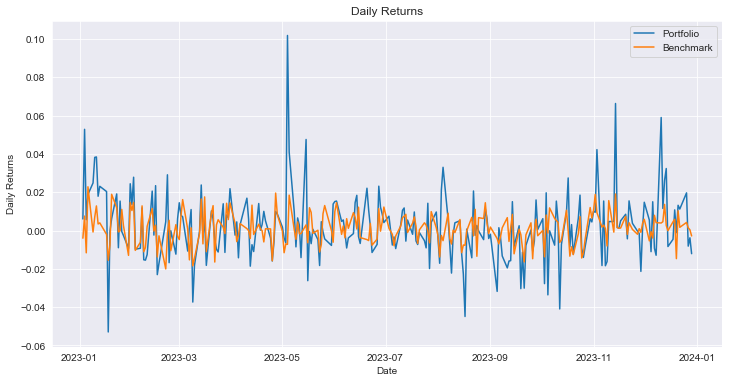

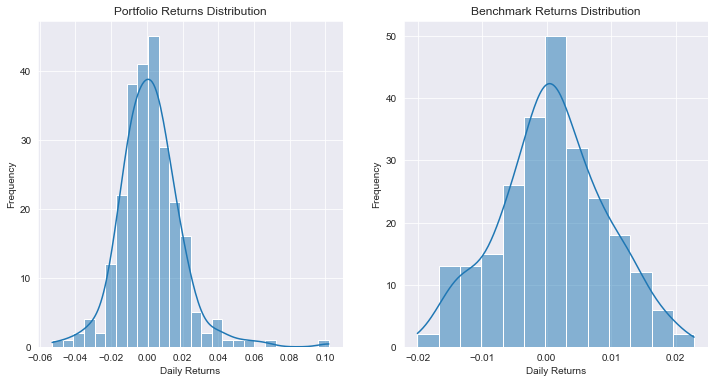

In [34]:
# Returns comparison
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(benchmark_returns.index, portfolio_returns, label='Portfolio')
ax.plot(benchmark_returns, label='Benchmark')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
ax.set_title('Daily Returns')
ax.legend()
plt.show()

# Returns distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(portfolio_returns, ax=axes[0], kde=True)
sns.histplot(benchmark_returns, ax=axes[1], kde=True)
axes[0].set_xlabel('Daily Returns')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Portfolio Returns Distribution')
axes[1].set_xlabel('Daily Returns')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Benchmark Returns Distribution')
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Best Sharpe Ratio:  nan
Best Sharpe Ratio:  14.985295746010472
Best Sharpe Ratio:  6.783143435554371
Best Sharpe Ratio:  5.443371758514608
Best Sharpe Ratio:  4.946129927848174
Best Sharpe Ratio:  4.876775136460492
Best Sharpe Ratio:  4.652983832354956
Best Sharpe Ratio:  4.47534117896304
Best Sharpe Ratio:  4.137648264136462
Best Sharpe Ratio:  3.394453648737386
Best Sharpe Ratio:  3.2693625730688236


C:\Users\DELL\AppData\Local\Temp/ipykernel_23408/4283476093.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp/ipykernel_23408/4283476093.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weights_history = weights_history.fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp/ipykernel_23408/4283476093.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  benchmark_value = initial_capital * benchmark_c

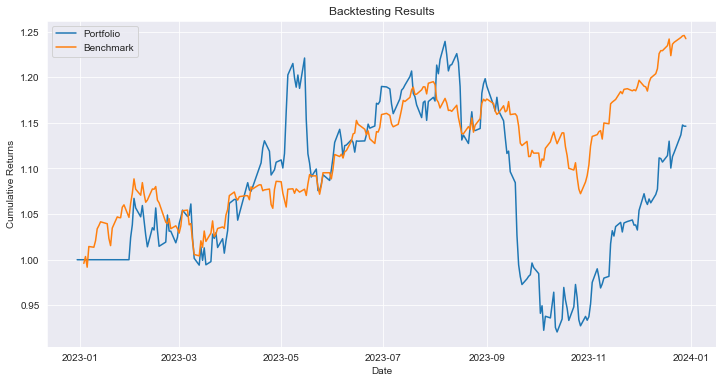

Portfolio Statistics:
---------------------
Mean Daily Return: 0.07%
Standard Deviation: 5.25%
Sharpe Ratio: -0.27
Final Value: 1146.38

Benchmark Statistics:
---------------------
Mean Daily Return: 0.09%
Standard Deviation: 2.86%
Sharpe Ratio: -0.49
Final Value: 1242.31



In [35]:
# Seed for reproducibility
np.random.seed(42)

def backtest_monthly(optimization_function, data, benchmark, initial_capital):

    # Initialize the portfolio value and the portfolio weights
    # initial_capital = 1000
    portfolio_value = initial_capital
    test_data = data.iloc[-252:]

    # Initialize history of weights and portfolio values
    weights_history = pd.DataFrame(index=test_data.index, columns=data.columns)
    portfolio_value_history = pd.Series(index=test_data.index, name='Portfolio Value', dtype='float')
    portfolio_value_history.iloc[0] = portfolio_value

    # Loop through the data one month at a time
    for i in range(21, len(test_data), 21):
        # Get the data for the current month
        month_data = test_data.iloc[i-21:i]

        # Call the optimization function to get the portfolio weights for the current month
        train_data = data.loc[:month_data.index[0]]
        weights = optimization_function(train_data, population_size=100, num_generations=50, mutation_rate=0.01, elitism=0.01)

        # Set any negative weights to 0
        weights[weights < 0] = 0

        # Normalize remaining positive weights to sum to 1
        weights /= weights.sum()

        # Save the weights for the current month
        weights_history.loc[month_data.index[-1]] = weights
        month_returns = month_data.pct_change() * weights

        # Loop through the data one day at a time
        for j in range(1, len(month_returns)):
            # Calculate the portfolio value for the current day
            day_returns = month_returns.iloc[j]
            portfolio_value = (1 + day_returns.sum()) * portfolio_value

            # Update the portfolio value and save it to the history
            portfolio_value_history.loc[month_returns.index[j]] = portfolio_value

    # Calculate the portfolio returns and the benchmark returns
    weights_history = weights_history.fillna(method='ffill')
    portfolio_returns = (weights_history[:-1] * test_data.pct_change()[1:]).sum(axis=1)
    benchmark_returns = benchmark.iloc[-252:].pct_change()[1:]


    # Calculate the statistics
    portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()
    benchmark_cumulative_returns = (1 + benchmark_returns).cumprod()
    portfolio_mean_return = portfolio_returns.mean()
    benchmark_mean_return = benchmark_returns.mean()
    portfolio_volatility = portfolio_returns.std() * np.sqrt(12)
    benchmark_volatility = benchmark_returns.std() * np.sqrt(12)
    sharpe_ratio = (portfolio_mean_return - 0.015) / portfolio_volatility
    benchmark_sharpe_ratio = (benchmark_mean_return - 0.015) / benchmark_volatility

    # Portfolio & Benchmark value
    benchmark_value = initial_capital * benchmark_cumulative_returns[-1]
    portfolio_value = initial_capital * portfolio_cumulative_returns[-1]


    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_cumulative_returns, label='Portfolio')
    plt.plot(benchmark_cumulative_returns, label='Benchmark')
    plt.legend(loc='upper left')
    plt.title('Backtesting Results')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.show()

    # Print the portfolio statistics
    print('Portfolio Statistics:')
    print('---------------------')
    print(f'Mean Daily Return: {portfolio_mean_return:.2%}')
    print(f'Standard Deviation: {portfolio_volatility:.2%}')
    print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
    print('Final Value: {:.2f}'.format(portfolio_value))
    print()

    # Print the benchmark statistics
    print('Benchmark Statistics:')
    print('---------------------')
    print(f'Mean Daily Return: {benchmark_mean_return:.2%}')
    print(f'Standard Deviation: {benchmark_volatility:.2%}')
    print(f'Sharpe Ratio: {benchmark_sharpe_ratio:.2f}')
    print('Final Value: {:.2f}'.format(benchmark_value))
    print()


    return weights_history, portfolio_value_history, portfolio_cumulative_returns, benchmark_cumulative_returns
  
# Run backtesting
weights_history, portfolio_value_history, portfolio_cumulative_returns, benchmark_cumulative_returns = backtest_monthly(genetic_algorithm, data, benchmark, initial_capital=1000)